## Generating Graphs with R

We are going to load the sample data, then view the data for each student as a bar graph with the average score listed as a horizontal line

In [2]:
library(reshape2)
library(ggplot2)

In [3]:
df <- read.csv('sampleData.csv')

In [4]:
head(df)

Question,Student,Pre,Post
1,Dave,85,95
2,Dave,46,55
3,Dave,65,77
4,Dave,75,90
5,Dave,54,75
6,Dave,46,80


In [5]:
# Here, we reshape the data so it is easier to plot as values in a chart

dfm <- melt(df, id= c('Question','Student'))

In [6]:
head(dfm)

Question,Student,variable,value
1,Dave,Pre,85
2,Dave,Pre,46
3,Dave,Pre,65
4,Dave,Pre,75
5,Dave,Pre,54
6,Dave,Pre,46


In [7]:
seq <- unique(df$Student) # we obtain each unique student name for looping, since the charts are differentiated by student, not question
seq

[1] Dave   Olivia Bruce  Sarah 
Levels: Bruce Dave Olivia Sarah

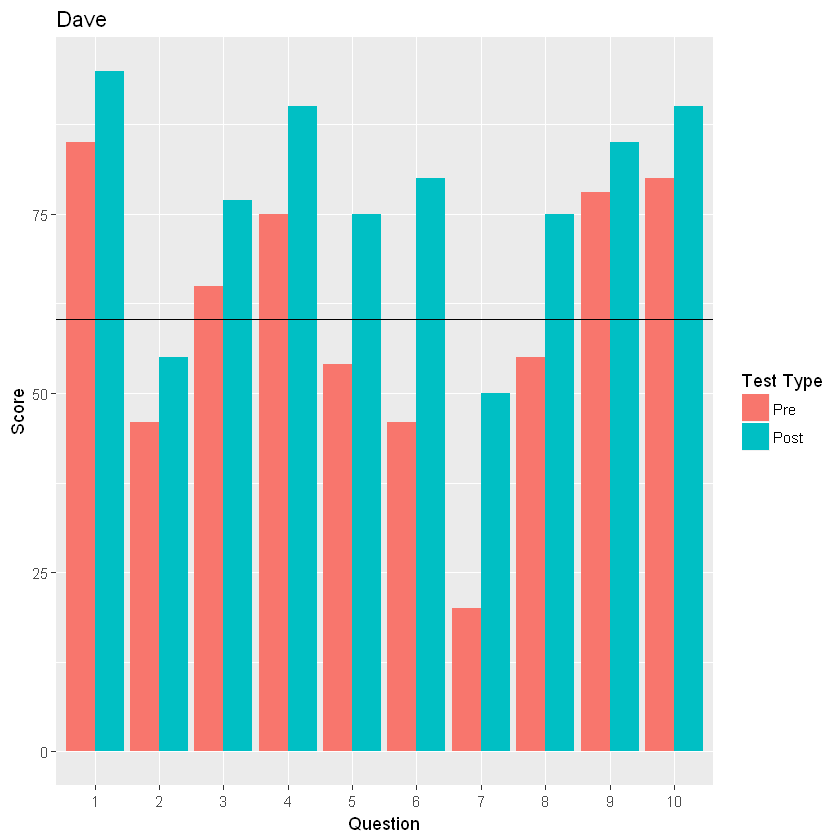

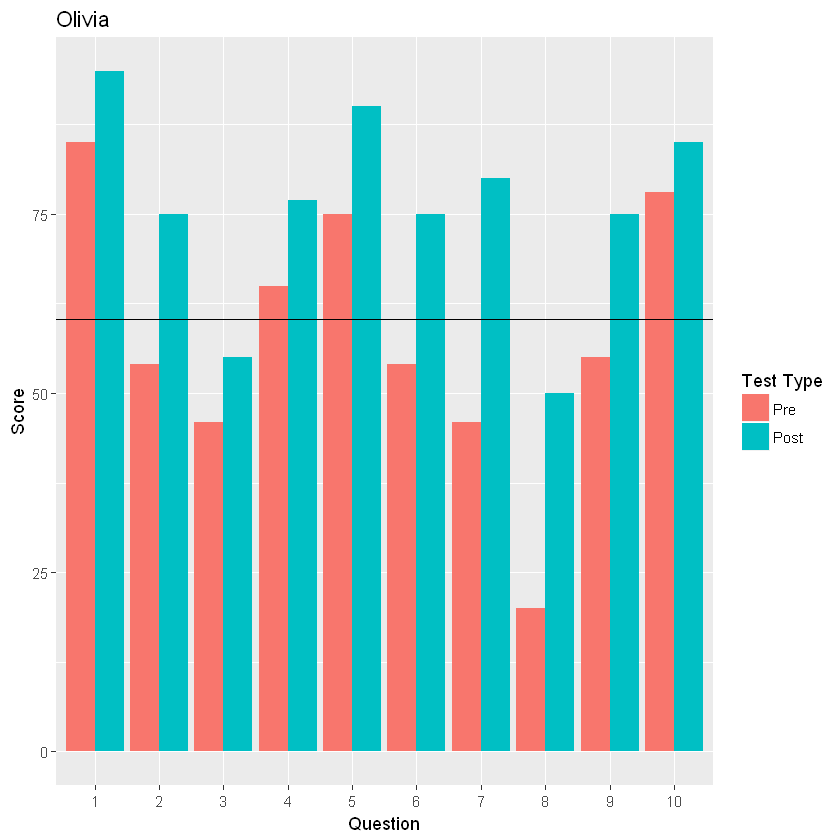

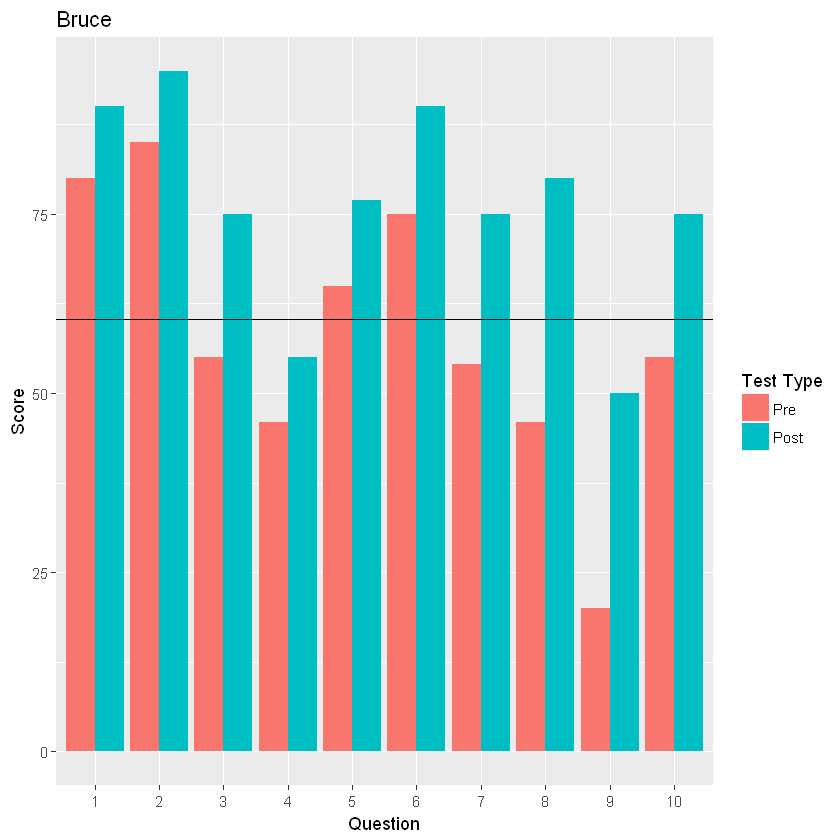

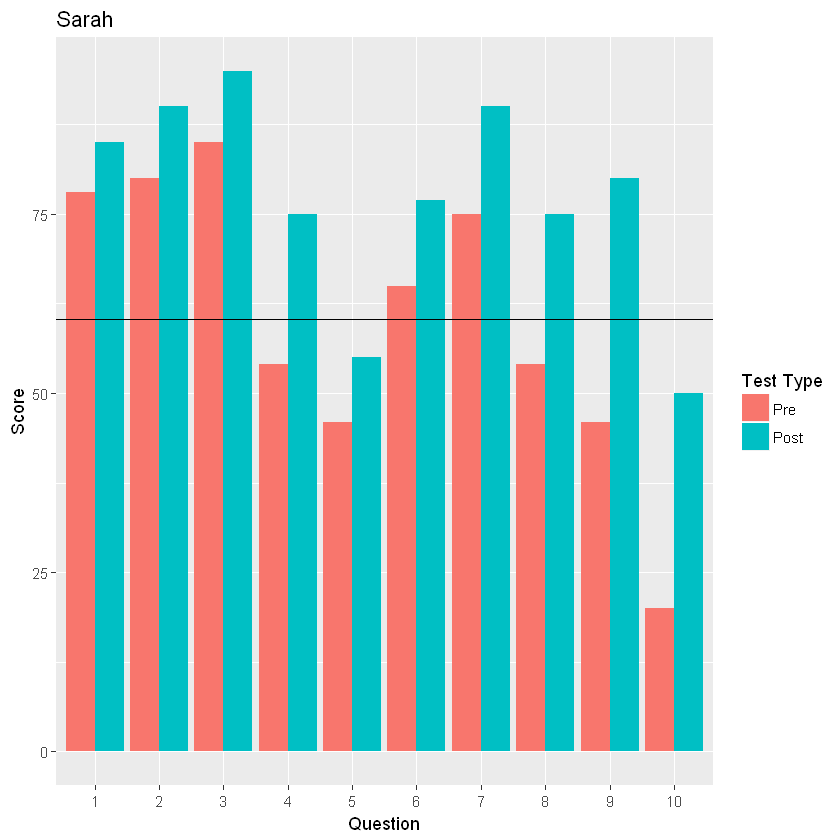

In [8]:
par(mfrow = c(1,4)) #this allows us to set up multiple plots

# we need to subset the data for each person, then plot each subset individually
# we create a loop to do this, and then create each chart as we pass through the loop

for (i in seq) {
    student <- subset(dfm, Student==i, select=Question:value)
    p <- ggplot(student,aes(x = factor(Question), y = value)) +
        geom_bar(aes(fill=variable), stat="identity", position="dodge") +
        geom_hline(yintercept = 60.3, color="black")
    plot(p + labs(title=i, x= "Question", y = "Score", fill = "Test Type" ))
    }